In [2]:
import re    
import nltk  
import string
import warnings
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [3]:
train  = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape)
print(test.shape)
print(train.columns)
print(test.columns)

(24209, 4)
(2500, 3)
Index(['Unnamed: 0', 'article_link', 'headline', 'is_sarcastic'], dtype='object')
Index(['Unnamed: 0', 'article_link', 'headline'], dtype='object')


In [4]:
train.head()

Unnamed: 0  \
0           0   
1           1   
2           2   
3           3   
4           4   

                                                                                              article_link  \
0                      https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5   
1                 https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365   
2            https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697   
3          https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302   
4  https://www.huffingtonpost.com/entry/jk-rowling-wishes-snape-happy-birthday_us_569117c4e4b0cad15e64fdcb   

                                                                               headline  \
0        former versace store clerk sues over secret 'black code' for minority shoppers   
1  the 'roseanne' revival catches up to our thorny political mood, for better and worse   
2       mom starting to fear son's web series closest thing she will have to grandchild   
3  boehner just wants wife to listen, not come up with alternative debt-reduction ideas   
4                      j.k. rowling wishes snape happy birthday in the most magical way   

   is_sarcastic  
0             0  
1             0  
2             1  
3             1  
4             0

In [5]:
train["is_sarcastic"].value_counts()

0    13542
1    10667
Name: is_sarcastic, dtype: int64

# Data Cleaning

In [6]:
combi = train.append(test, ignore_index=True)
print(combi.shape)
print(combi.columns)

(26709, 4)
Index(['Unnamed: 0', 'article_link', 'headline', 'is_sarcastic'], dtype='object')


/home/aakirti/.local/lib/python3.5/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [7]:
combi = combi.drop(['Unnamed: 0', 'article_link'], axis = 1)
print(combi.shape)
combi.head()

(26709, 2)


headline  \
0        former versace store clerk sues over secret 'black code' for minority shoppers   
1  the 'roseanne' revival catches up to our thorny political mood, for better and worse   
2       mom starting to fear son's web series closest thing she will have to grandchild   
3  boehner just wants wife to listen, not come up with alternative debt-reduction ideas   
4                      j.k. rowling wishes snape happy birthday in the most magical way   

   is_sarcastic  
0           0.0  
1           0.0  
2           1.0  
3           1.0  
4           0.0

In [8]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

In [9]:
#removing '@user' string 
combi['tidy_headline'] = np.vectorize(remove_pattern)(combi['headline'], "@[\w]*") 

In [10]:
# remove anything except a-z, A-Z and #, eg <:"{} !@#123"
combi['tidy_headline'] = combi['tidy_headline'].str.replace("[^a-zA-Z#]", " ")

In [11]:
# removing short words (length < 2)
combi['tidy_headline'] = combi['tidy_headline'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [12]:
tokenized_headline = combi['tidy_headline'].apply(lambda x: x.split()) # tokenizing

In [13]:
tokenized_headline

0                                               [former, versace, store, clerk, sues, over, secret, black, code, for, minority, shoppers]
1                                                [the, roseanne, revival, catches, our, thorny, political, mood, for, better, and, worse]
2                                                    [mom, starting, fear, son, web, series, closest, thing, she, will, have, grandchild]
3                                              [boehner, just, wants, wife, listen, not, come, with, alternative, debt, reduction, ideas]
4                                                                      [rowling, wishes, snape, happy, birthday, the, most, magical, way]
5                                                                                                          [advancing, the, world, women]
6                                                                                 [the, fascinating, case, for, eating, lab, grown, meat]
7                                 

In [14]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_headline = tokenized_headline.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [15]:
tokenized_headline # porter stemmer breaksthe sentence and convert each word into root word. and stich back the sentence

0                               [former, versac, store, clerk, sue, over, secret, black, code, for, minor, shopper]
1                                    [the, roseann, reviv, catch, our, thorni, polit, mood, for, better, and, wors]
2                                   [mom, start, fear, son, web, seri, closest, thing, she, will, have, grandchild]
3                                  [boehner, just, want, wife, listen, not, come, with, altern, debt, reduct, idea]
4                                                       [rowl, wish, snape, happi, birthday, the, most, magic, way]
5                                                                                       [advanc, the, world, women]
6                                                                   [the, fascin, case, for, eat, lab, grown, meat]
7                                            [thi, ceo, will, send, your, kid, school, you, work, for, hi, compani]
8                                                              [top, sna

In [16]:
for i in range(len(tokenized_headline)):
    tokenized_headline[i] = ' '.join(tokenized_headline[i])
    
combi['tidy_headline'] = tokenized_headline

In [17]:
combi.head()

headline  \
0        former versace store clerk sues over secret 'black code' for minority shoppers   
1  the 'roseanne' revival catches up to our thorny political mood, for better and worse   
2       mom starting to fear son's web series closest thing she will have to grandchild   
3  boehner just wants wife to listen, not come up with alternative debt-reduction ideas   
4                      j.k. rowling wishes snape happy birthday in the most magical way   

   is_sarcastic  \
0           0.0   
1           0.0   
2           1.0   
3           1.0   
4           0.0   

                                                            tidy_headline  
0  former versac store clerk sue over secret black code for minor shopper  
1       the roseann reviv catch our thorni polit mood for better and wors  
2      mom start fear son web seri closest thing she will have grandchild  
3     boehner just want wife listen not come with altern debt reduct idea  
4                       rowl wish snape happi birthday the most magic way

In [18]:
all_words = ' '.join([text for text in combi['tidy_headline']])
all_words

'former versac store clerk sue over secret black code for minor shopper the roseann reviv catch our thorni polit mood for better and wors mom start fear son web seri closest thing she will have grandchild boehner just want wife listen not come with altern debt reduct idea rowl wish snape happi birthday the most magic way advanc the world women the fascin case for eat lab grown meat thi ceo will send your kid school you work for hi compani top snake handler leav sink huckabe campaign friday morn email insid trump presser for the age airlin passeng tackl man who rush cockpit bomb threat facebook reportedli work healthcar featur and app north korea prais trump and urg voter reject dull hillari actual cnn jeffrey lord ha been indefens for while barcelona hold huge protest support refuge nuclear bomb deton dure rehears for spider man music cosbi lawyer ask whi accus didn come forward smear legal team year ago stock analyst confus frighten boar market bloomberg program build better citi just

In [21]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
tokens = all_words.split()
print(tokens)

['former', 'versac', 'store', 'clerk', 'sue', 'over', 'secret', 'black', 'code', 'for', 'minor', 'shopper', 'the', 'roseann', 'reviv', 'catch', 'our', 'thorni', 'polit', 'mood', 'for', 'better', 'and', 'wors', 'mom', 'start', 'fear', 'son', 'web', 'seri', 'closest', 'thing', 'she', 'will', 'have', 'grandchild', 'boehner', 'just', 'want', 'wife', 'listen', 'not', 'come', 'with', 'altern', 'debt', 'reduct', 'idea', 'rowl', 'wish', 'snape', 'happi', 'birthday', 'the', 'most', 'magic', 'way', 'advanc', 'the', 'world', 'women', 'the', 'fascin', 'case', 'for', 'eat', 'lab', 'grown', 'meat', 'thi', 'ceo', 'will', 'send', 'your', 'kid', 'school', 'you', 'work', 'for', 'hi', 'compani', 'top', 'snake', 'handler', 'leav', 'sink', 'huckabe', 'campaign', 'friday', 'morn', 'email', 'insid', 'trump', 'presser', 'for', 'the', 'age', 'airlin', 'passeng', 'tackl', 'man', 'who', 'rush', 'cockpit', 'bomb', 'threat', 'facebook', 'reportedli', 'work', 'healthcar', 'featur', 'and', 'app', 'north', 'korea', '

In [24]:
# Converts each token into lowercase 
comment_words = ""
for i in range(len(tokens)): 
    tokens[i] = tokens[i].lower() 

for words in tokens: 
    comment_words = comment_words + words + ' '

print(comment_words)

former versac store clerk sue over secret black code for minor shopper the roseann reviv catch our thorni polit mood for better and wors mom start fear son web seri closest thing she will have grandchild boehner just want wife listen not come with altern debt reduct idea rowl wish snape happi birthday the most magic way advanc the world women the fascin case for eat lab grown meat thi ceo will send your kid school you work for hi compani top snake handler leav sink huckabe campaign friday morn email insid trump presser for the age airlin passeng tackl man who rush cockpit bomb threat facebook reportedli work healthcar featur and app north korea prais trump and urg voter reject dull hillari actual cnn jeffrey lord ha been indefens for while barcelona hold huge protest support refuge nuclear bomb deton dure rehears for spider man music cosbi lawyer ask whi accus didn come forward smear legal team year ago stock analyst confus frighten boar market bloomberg program build better citi just 

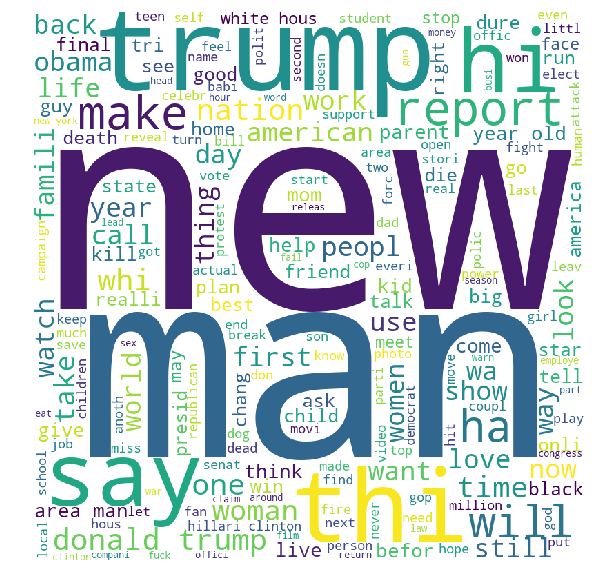

In [25]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Bag of Words

In [26]:
from sklearn.feature_extraction.text import  CountVectorizer
import gensim
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_headline'])
bow.shape

(26709, 1000)

In [28]:
bow[1]

<1x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

 #  W2V

In [29]:
tokenized_headline = combi['tidy_headline'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_headline,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_headline, total_examples= len(combi['tidy_headline']), epochs=20)

4098648

In [30]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [31]:
token = tokenized_headline[0]

In [32]:
wordvec_arrays = np.zeros((len(tokenized_headline), 200))

for i in range(len(tokenized_headline)):
    wordvec_arrays[i,:] = word_vector(tokenized_headline[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(26709, 200)

In [33]:
wordvec_df.head()

0         1         2         3         4         5         6    \
0  0.071390 -0.196185  0.445323  0.040037  0.031377 -0.327106 -0.305627   
1  0.257329 -0.195105  0.086774  0.421600  0.228680 -0.045546 -0.189108   
2  0.038840 -0.268081  0.051676  0.236445  0.059473 -0.253197 -0.225641   
3  0.134488 -0.369817  0.008960  0.061351  0.188181 -0.091219 -0.211294   
4  0.280317 -0.112187  0.046338  0.301106  0.114066 -0.218693 -0.319218   

        7         8         9    ...       190       191       192       193  \
0  0.069047 -0.033438  0.008739  ...  0.011552 -0.020125  0.148796  0.177968   
1  0.030123  0.100440  0.445302  ...  0.231266 -0.057846  0.030277 -0.035550   
2 -0.061970  0.090667  0.254963  ...  0.085168 -0.011495  0.193427 -0.019012   
3  0.254399  0.041613  0.132811  ...  0.035790  0.014798  0.110401  0.023116   
4 -0.069225  0.070504  0.102039  ...  0.024888 -0.171453  0.044008 -0.291528   

        194       195       196       197       198       199  
0 -0.196963 -0.062592  0.078665  0.088579  0.113349  0.067265  
1 -0.208827 -0.021397 -0.114310 -0.027254  0.208487  0.187016  
2 -0.436511 -0.034374 -0.010340 -0.009054  0.067703  0.306866  
3 -0.267928 -0.069967 -0.085894 -0.079270 -0.061888  0.304693  
4 -0.417103  0.058204 -0.156283  0.153830 -0.084811  0.108232  

[5 rows x 200 columns]

 # Model

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [35]:
# Extracting train and test BoW features
train_bow = bow[:24209,:]
test_bow = bow[24209:,:]
print(train_bow.shape)

train.shape

(24209, 1000)


(24209, 4)

In [36]:
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['is_sarcastic'],  
                                                          random_state=42, 
                                                          test_size=0.3)

# X_train,Xtest, y_train, ytest 

In [40]:
lreg = LogisticRegression()

lreg.fit(xtrain_bow, ytrain)

prediction = lreg.predict_proba(xvalid_bow) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) 

0.7218355246197473

# XGBoost

In [42]:
import xgboost as xgb
train_w2v = wordvec_df.iloc[:24209,:]
test_w2v = wordvec_df.iloc[24209:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

Train: X_train, y_train
Test: X-test , ytest 

In [43]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain)

prediction = xgb.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.7928469694571926

In [44]:
prediction_test = xgb.predict(test_w2v)

In [45]:
prediction_test.shape

(2500,)

In [47]:
output = test.copy()

In [48]:
output["is_sarcastic"] = prediction_test

In [50]:
output.to_csv('output.csv')